In [11]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fftpack
import matplotlib.cm as cm
%matplotlib inline

# 1

(256, 256)


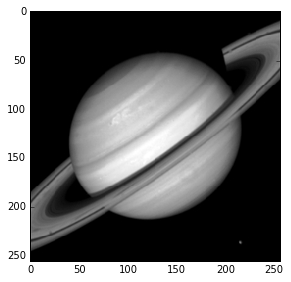

In [86]:
saturn = io.imread('saturn.jpg').astype('float64')/256.0
print(saturn.shape)
io.imshow(saturn)
io.show()

In [146]:
def visualize_fft(spectre):
    abs_spectre = np.abs(spectre)
    abs_values = list(abs_spectre.reshape(abs_spectre.shape[0] * abs_spectre.shape[1]))
    abs_values.sort()
    
    all_sum = np.sum(abs_values)
    current_sum = 0
    for value in abs_values:
        current_sum += value
        if (current_sum > 0.01 * all_sum):
            quantile1 = value
            break
            
    current_sum = 0
    for value in abs_values:
        current_sum += value
        if (current_sum > 0.6 * all_sum):
            quantile2 = value
            break
    
    #quantile1 = abs_values[0 *len(abs_values) / 100]
    #quantile2 = abs_values[int(99 * len(abs_values)) / 100]
    print (quantile1)
    print (quantile2)

    for i in xrange(abs_spectre.shape[0]):
        for j in xrange(abs_spectre.shape[1]):
            if abs_spectre[i][j] > quantile2:
                abs_spectre[i][j] = quantile2
            if abs_spectre[i][j] < quantile1:
                abs_spectre[i][j] = quantile1

    io.imshow(abs_spectre, cmap=cm.gray)
    io.show()

0.00184268946762
0.727922847475


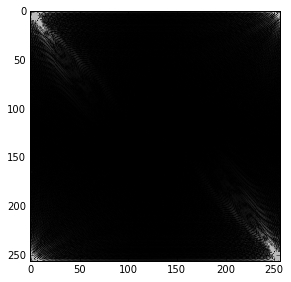

0.00184268946762
0.727922847475


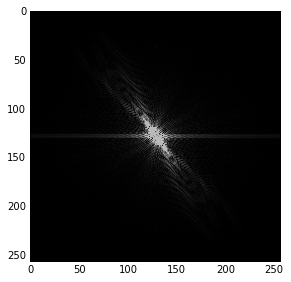

In [147]:
saturn_spectre = scipy.fftpack.fft2(saturn) / 256.0
saturn_spectre_shift = scipy.fftpack.fftshift(saturn_spectre)
visualize_fft(saturn_spectre)
visualize_fft(saturn_spectre_shift)

Почистив самые большие частоты, видим много горизонтальных полосок (скорее всего, отображающих кольца и полоски на Юпитере), а также видим мощное направление из верхнего левого угла в нижний правый -- по-видимому, оно отвечают за противоположное полоскам направление планеты.

На самом деле эксперименты с занулением различных частот показывают, что эти выводы далеки от правдивых, но что-то я все равно не понял:(

# 2

In [174]:
magic_const = 400

def low_pass(spectre_shift):
    for i in xrange(spectre_shift.shape[0]):
        for j in xrange(spectre_shift.shape[1]):
            if ((i - spectre_shift.shape[0]/2) ** 2 + (j - spectre_shift.shape[1]/2) ** 2) > magic_const:
                spectre_shift[i][j] = complex(0 + 0j)
    visualize_fft(spectre_shift)
    return scipy.fftpack.ifft2(spectre_shift)

def high_pass(spectre_shift):
    for i in xrange(spectre_shift.shape[0]):
        for j in xrange(spectre_shift.shape[1]):
            if ((i - spectre_shift.shape[0]/2) ** 2 + (j - spectre_shift.shape[1]/2) ** 2) < magic_const:
                spectre_shift[i][j] = complex(0 + 0j)
    visualize_fft(spectre_shift)
    return scipy.fftpack.ifft2(spectre_shift)

0.0790254883983
3.58502270419


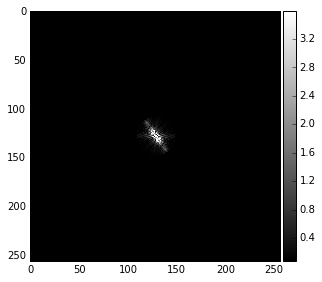

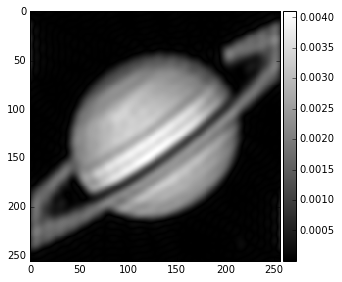

In [177]:
io.imshow(np.abs(low_pass(saturn_spectre_shift.copy())), cmap=cm.gray)
io.show()

Низкие частоты

0.00135252648689
0.0644444666031


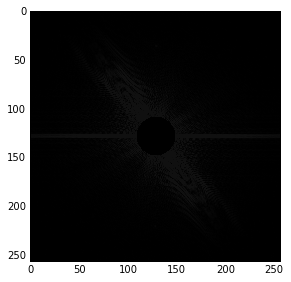

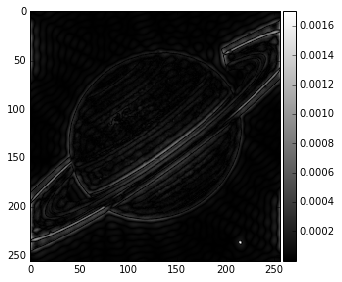

In [178]:
io.imshow(np.abs(high_pass(saturn_spectre_shift.copy())), cmap=cm.gray)
io.show()

Высокие частоты